In [1]:
import pandas as pd
import seaborn as sb
from scipy.stats import linregress
import itertools
from sklearn import decomposition
import numpy as np

import plotly.plotly as py
from plotly.graph_objs import *

In [37]:
df = pd.read_csv("/home/iaradsouza/python_data_science/project/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [38]:
df = df.iloc[:,1:32]


In [40]:
df.head()
cols = list(df.columns[1:])
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

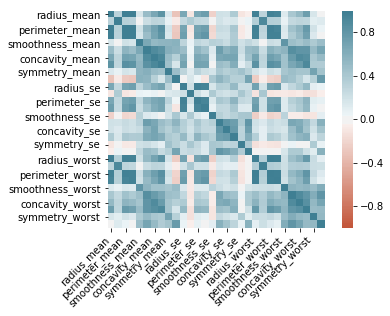

In [5]:
corr = df.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
corr

In [106]:
from plotly import graph_objs as go

# Create the data object for plotly
data = [
    go.Heatmap(
        z= corr.values, # subset with ix method (similar to loc and iloc)
        x=corr.columns.values, # set x values
        y=corr.columns.values, # set y values
        colorscale='RdBu', # predefined pallete
        text = True , # sets text elements associated with each (x,y) pair.
        opacity = 1.0, # alpha
        zmin = -1,
        zmax= 1
        
    )
]


layout = go.Layout( # set layout for plotly
    title='Pearson correlation of all variables', # title
    xaxis = dict(ticks=''), # Set x axis layout
    yaxis = dict(ticks=''), # Set y axis layout
    width = 700, height = 700, # Figure size
    
)


fig = go.Figure(data=data, layout=layout) # Creates the figure object for plotly 
py.iplot(fig, filename='labelled-heatmap')

In [28]:
# Generate all possible combinations between variables
comb = [ list(i) for i in list(itertools.combinations(cols, 2)) ]

# Define regression function to this dataset
def calculate_regression(df, comb, p_value=0.05):
    corr_list = [ list(linregress(df[ comb[i][0] ], df[ comb[i][1] ])) for i in range(len(comb)) ]
    corr_df = pd.DataFrame(corr_list, columns= ['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
    print("Number of significant correlations (p-value <=", p_value, "): ", len(corr_df[ corr_df.p_value <= p_value ]))
    corr_df['comb'] = comb
    return(corr_df)

# Run regression analysis
corr_df = calculate_regression(df, comb)



Number of significant correlations (p-value <= 0.05 ):  389


In [65]:
df_m = df[ df.diagnosis == 'M' ]
df_b = df[ df.diagnosis == 'B' ]

comb = [ list(i) for i in list(itertools.combinations(cols, 2)) ]

corr_df_m = calculate_regression(df_m, comb)
corr_df_b = calculate_regression(df_b, comb)

corr_df_m = corr_df_m.sort_values('p_value', ascending=True)
corr_df_b = corr_df_b.sort_values('p_value', ascending=True)

top_10_m = corr_df_m.loc[:10,:]
top_10_b = corr_df_b.loc[:10,:]


Number of significant correlations (p-value <= 0.05 ):  302
Number of significant correlations (p-value <= 0.05 ):  321


In [67]:
subs = '_mean'

cols_mean = [ i for i in cols if subs in i ]

In [76]:
comb_mean = [ list(i) for i in list(itertools.combinations(cols_mean, 2)) ]

df_m_mean = df_m[ cols_mean ]
df_b_mean = df_b[ cols_mean ]

corr_m_mean = calculate_regression(df_m_mean, comb_mean).sort_values('p_value', ascending=True)
corr_b_mean = calculate_regression(df_b_mean, comb_mean).sort_values('p_value', ascending=True)


Number of significant correlations (p-value <= 0.05 ):  31
Number of significant correlations (p-value <= 0.05 ):  34


In [78]:
corr_m_mean.head(10)

,slope,intercept,r_value,p_value,std_err,comb
1,6.788929,-3.188534,0.995281,9.825960e-215,0.045672,"[radius_mean, perimeter_mean]"
2,113.698736,-1007.125296,0.990078,5.845489e-181,1.113528,"[radius_mean, area_mean]"
17,16.620568,-939.061689,0.987223,1.728075e-169,0.185124,"[perimeter_mean, area_mean]"
39,0.415642,0.021165,0.907119,7.150252e-81,0.013308,"[concavity_mean, concave points_mean]"
35,1.177954,-0.010250,0.847712,9.721692e-60,0.050865,"[compactness_mean, concavity_mean]"
38,0.106096,0.047276,0.756318,1.444998e-40,0.006333,"[compactness_mean, fractal_dimension_mean]"
34,0.451513,0.016220,0.751690,7.945949e-40,0.027337,"[smoothness_mean, fractal_dimension_mean]"
21,0.001148,-0.044498,0.730158,1.382240e-36,0.000074,"[perimeter_mean, concave points_mean]"
36,0.463104,0.020753,0.727349,3.470883e-36,0.030152,"[compactness_mean, concave points_mean]"
37,0.357362,0.141024,0.698061,2.697191e-32,0.025295,"[compactness_mean, symmetry_mean]"


In [79]:
corr_b_mean.head(10)

,slope,intercept,r_value,p_value,std_err,comb
1,6.610058,-2.213821,0.996769,0.000000e+00,0.028271,"[radius_mean, perimeter_mean]"
2,75.000798,-448.208787,0.994435,0.000000e+00,0.421718,"[radius_mean, area_mean]"
17,11.266795,-416.869431,0.990653,3.117048e-309,0.082336,"[perimeter_mean, area_mean]"
35,0.971811,-0.031769,0.754994,4.846566e-67,0.044797,"[compactness_mean, concavity_mean]"
36,0.353585,-0.002599,0.750119,9.830075e-66,0.016544,"[compactness_mean, concave points_mean]"
39,0.260674,0.013711,0.711823,2.002225e-56,0.013651,"[concavity_mean, concave points_mean]"
38,0.138385,0.051785,0.692198,3.186225e-52,0.007658,"[compactness_mean, fractal_dimension_mean]"
30,1.408958,-0.050213,0.561333,5.001641e-31,0.110250,"[smoothness_mean, compactness_mean]"
34,0.281181,0.036864,0.560336,6.693101e-31,0.022059,"[smoothness_mean, fractal_dimension_mean]"
8,-0.002022,0.087424,-0.533492,1.194972e-27,0.000170,"[radius_mean, fractal_dimension_mean]"


# PCA

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [41]:
pca = decomposition.PCA()
pca.fit(df.iloc[:,1:].values.tolist())
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = df.loc[:, cols].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape
np.mean(x),np.std(x)

(1.2487570048507913e-18, 1.0)

In [96]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['pc1', 'pc2'])
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


In [113]:
principal_breast_Df['diagnosis'] = df['diagnosis']

In [129]:
from plotly import graph_objs as go

colorsIdx = {'M': 'red', 'B': 'blue'}
cols      = principal_breast_Df['diagnosis'].map(colorsIdx)

data = [
    go.Scatter(
    x=principal_breast_Df['pc1'], 
    y=principal_breast_Df['pc2'], 
    mode='markers', marker=dict(color = cols))
]

layout = go.Layout(width = 700, height = 700, showlegend=True)

fig = go.Figure(data=data, layout=layout) # Creates the figure object for plotly 
fig.add_trace(go.Scatter(
    x=principal_breast_Df['pc1'], 
    y=principal_breast_Df['pc2'], 
    name="Malignant"
))

fig.add_trace(go.Scatter(
    x=principal_breast_Df['pc1'], 
    y=principal_breast_Df['pc2'], 
    name="Benign"
))
fig.update_layout(showlegend=True)
py.iplot(fig, filename='labelled-heatmap')



TypeError: 'NoneType' object is not callable